In [22]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [2]:
!conda install geopandas

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/DSX-Python35

  added / updated specs: 
    - geopandas


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    libboost-1.67.0            |       h46d08c1_4        20.9 MB
    kealib-1.4.7               |       h79811e5_5         170 KB
    rtree-0.8.3                |   py35h2f9c1c0_0          46 KB
    libnetcdf-4.4.1.1          |       h816af47_8         3.8 MB
    pyproj-1.9.5.1             |           py35_0         3.3 MB
    poppler-data-0.4.9         |                0         3.5 MB
    geopandas-0.4.1            |             py_0         891 KB
    freexl-1.0.5               |       h14c3975_0          44 KB
    giflib-5.1.4               |       h14c3975_1          78 KB
    libkml-1.3.0               |       h590aaf7_4         633 KB
    geos-3.6.2                 |       heeff764_2         1.6

In [3]:
import geopandas

In [7]:
!conda install --channel conda-forge geoplot
import geoplot

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/DSX-Python35

  added / updated specs: 
    - geoplot


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2019.3.9   |       hecc5488_0         146 KB  conda-forge
    owslib-0.17.1              |             py_0         118 KB  conda-forge
    pyepsg-0.4.0               |             py_0          20 KB  conda-forge
    cartopy-0.16.0             |   py35h81b52dc_2         2.3 MB  conda-forge
    pyshp-2.1.0                |             py_0          31 KB  conda-forge
    certifi-2018.8.24          |        py35_1001         139 KB  conda-forge
    geoplot-0.2.4              |             py_0          30 KB  conda-forge
    openssl-1.0.2r             |       h14c3975_0         3.1 MB  conda-forge
    ------------------------------------------------------------
                        

In [11]:
url = "https://opendata.arcgis.com/datasets/1ef75e34b8504ab9b14bef0c26cade2c_3.zip"
df_PDX = geopandas.read_file(url)

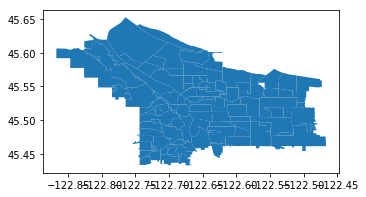

In [12]:
 df_PDX.plot(figsize=(10, 3))

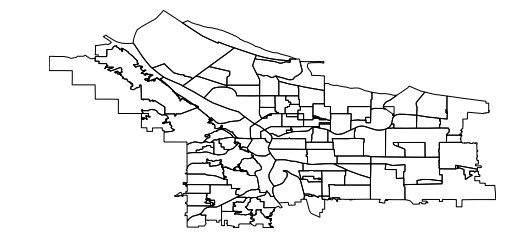

In [13]:
geoplot.polyplot(df_PDX, figsize=(8, 4))

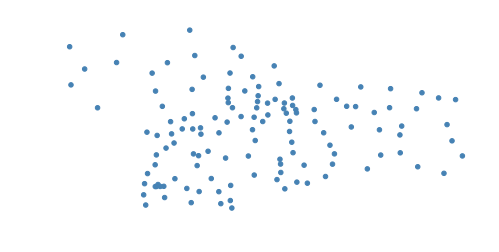

In [14]:
df_PDX['centroid_column'] = df_PDX.centroid
df_PDX = df_PDX.set_geometry('centroid_column')
geoplot.pointplot(df_PDX, figsize=(8, 4))

In [15]:
df_PDX.head()

,OBJECTID,NAME,COMMPLAN,SHARED,COALIT,HORZ_VERT,Shape_Leng,MAPLABEL,geometry,centroid_column
0,1,LINNTON,None,None,NWNW,HORZ,52741.719772,Linnton,POLYGON ((-122.8237089611819 45.60615857772244...,POINT (-122.7932636868732 45.60378993637904)
1,2,FOREST PARK/LINNTON,None,Y,NWNW,None,57723.635350,Forest Park/Linnton,POLYGON ((-122.8231909270121 45.60615651892255...,POINT (-122.7817746512876 45.58063023423168)
2,3,FOREST PARK,None,None,NWNW,HORZ,82222.098924,Forest Park,POLYGON ((-122.7558129418403 45.51954858251791...,POINT (-122.7922472760931 45.56412790016483)
3,4,CATHEDRAL PARK,None,None,NPNS,HORZ,11434.254777,Cathedral Park,"POLYGON ((-122.7646055108057 45.58518893125, -...",POINT (-122.7573167006587 45.58736826406707)
4,5,UNIVERSITY PARK,None,None,NPNS,HORZ,11950.859827,University Park,POLYGON ((-122.7385520535061 45.58394808045919...,POINT (-122.730079200974 45.57635375668904)


In [16]:
url = "https://opendata.arcgis.com/datasets/17418ff4986440dcb7058b1c6533e94b_384.zip"
df_SEA = geopandas.read_file(url)

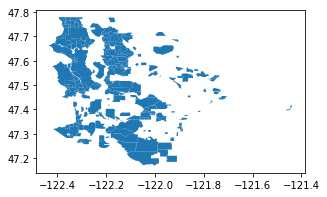

In [17]:
 df_SEA.plot(figsize=(10, 3))

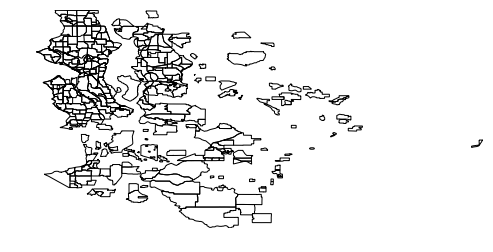

In [18]:
geoplot.polyplot(df_SEA, figsize=(8, 4))

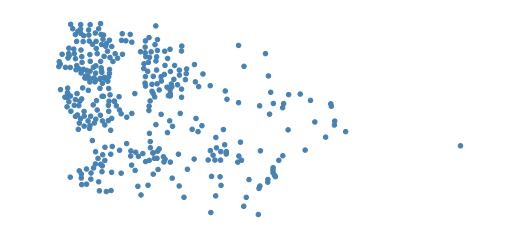

In [19]:
df_SEA['centroid_column'] = df_SEA.centroid
df_SEA = df_SEA.set_geometry('centroid_column')
geoplot.pointplot(df_SEA, figsize=(8, 4))

In [20]:
df_SEA.head()

,OBJECTID,NEIGH_NUM,NEIGHBORHO,SHAPE_Leng,SHAPE_Area,geometry,centroid_column
0,1,37,University District,40436.205860,4.948493e+07,POLYGON ((-122.3189590288485 47.67250069638226...,POINT (-122.3083432983634 47.65974477809413)
1,2,38,Wallingford,32080.778300,4.210762e+07,"POLYGON ((-122.346114180476 47.66505276831814,...",POINT (-122.333074933286 47.6600056037032)
2,3,101,Interbay,59930.630161,3.372042e+07,"POLYGON ((-122.397942744914 47.66481700558359,...",POINT (-122.3810137208626 47.6415067002665)
3,4,227,West Campus - Fed Way,36341.429112,6.639272e+07,"POLYGON ((-122.348030734308 47.3151893486264, ...",POINT (-122.3317456456217 47.30427628594848)
4,5,245,Berkshire Glen,10597.297569,7.048653e+06,POLYGON ((-122.1764963769378 47.32992973688438...,POINT (-122.1710183904485 47.33329555183212)


In [23]:
!wget -O OnPremise.xls https://lcb.wa.gov/sites/default/files/publications/Public_Records/2019/On%20Premise.xls
WAOnPrem = pd.read_excel("OnPremise.xls")
WAOnPrem.head()

,Tradename,License Number,Unnamed: 2,ID Number,Unnamed: 4,Loc Address,Loc Room,Loc City,Loc St,Loc Zip,...,Business Startup Date,Issue Date,Expire Date,Privilege,Application Date,Reason Description,County,Status,Night Phone,Licensee
0,'AMONOS! MEXICAN KITCHEN,409730,NaN,6033641060010001,NaN,15321 MAIN ST NE STE 201,,DUVALL,WA,980198574,...,20180327,20190207,20200131,BEER/WINE REST - BEER/WINE,20190207,RENEWAL,KING,ACTIVE (ISSUED),2062341746,NIKOS NORTHWEST LLC
1,/NA:M/ THAI CUISINE,76997,NaN,6028006010010001,NaN,1404 34TH AVE,,SEATTLE,WA,981223334,...,20090608,20190212,20200229,SPIRITS/BR/WN REST LOUNGE +,20190212,RENEWAL,KING,ACTIVE (ISSUED),2063544900,W2K LLC
2,00 PIZZA,409193,NaN,6029630190010002,NaN,31217 124TH AVE SE STE 6,,AUBURN,WA,980923618,...,20121015,20171104,20181031,BEER/WINE REST - BEER/WINE,20171104,RENEWAL,KING,ACTIVE (ISSUED),2069542522,"ORGANICWAY, LLC"
3,028 BARBER SHOP,426995,NaN,6042693900010001,NaN,14031 NE WOODINVILLE DUVALL RD,,WOODINVILLE,WA,980728504,...,20181115,20190306,20200331,SNACK BAR,20190306,RENEWAL,KING,ACTIVE (ISSUED),4258693670,"NEW EASTHILL, LLC"
4,101 BAR & GRILL,353737,NaN,6028914650010001,NaN,322 LINCOLN ST,,HOQUIAM,WA,985501409,...,20090317,20190129,20200131,SPIRITS/BR/WN REST LOUNGE -,20190129,RENEWAL,GRAYS HARBOR,ACTIVE (ISSUED),2535663698,"PIG, INC"


In [24]:
WAOnPrem.columns

Index(['Tradename', 'License Number', 'Unnamed: 2', 'ID Number', 'Unnamed: 4',
       'Loc Address', 'Loc Room', 'Loc City', 'Loc St', 'Loc Zip', 'Phone',
       'Mail Address', 'Mail City', 'Mail State', 'Mail Zip',
       'Business Startup Date', 'Issue Date', 'Expire Date', 'Privilege',
       'Application Date', 'Reason Description', 'County', 'Status',
       'Night Phone', 'Licensee'],
      dtype='object')

In [25]:
WAOnPrem.shape

(10783, 25)

In [31]:
WAOnPrem.drop(['License Number', 'Unnamed: 2', 'ID Number', 'Unnamed: 4','Loc Room', 'Phone',
       'Mail Address', 'Mail City', 'Mail State', 'Mail Zip', 'Issue Date', 'Expire Date','Application Date', 'Reason Description', 'Night Phone', 'Licensee'], axis=1, inplace=True)

In [32]:
WAOnPrem.shape

(10783, 9)

In [36]:
WA_KING = WAOnPrem[WAOnPrem.County = 'KING']

SyntaxError: invalid syntax (<ipython-input-36-810f56e67bc9>, line 1)

In [35]:
WA_KING.head()

,Tradename,Loc Address,Loc City,Loc St,Loc Zip,Business Startup Date,Privilege,County,Status
4,101 BAR & GRILL,322 LINCOLN ST,HOQUIAM,WA,985501409,20090317,SPIRITS/BR/WN REST LOUNGE -,GRAYS HARBOR,ACTIVE (ISSUED)
5,101 BREWERY,294-793 HWY 101,QUILCENE,WA,983760416,20121130,BEER/WINE REST - BEER/WINE,JEFFERSON,ACTIVE (ISSUED)
6,1022 SOUTH,1022 S J ST,TACOMA,WA,984054154,20090320,SPIRITS/BR/WN REST LOUNGE -,PIERCE,ACTIVE (ISSUED)
8,110 DEGREES SIAM SOUL ASIAN & BAR,1912 201ST PL SE STE 207,BOTHELL,WA,980128570,20180412,SPIRITS/BR/WN REST LOUNGE +,SNOHOMISH,ACTIVE (ISSUED)
9,112TH ST DINER,11126 EVERGREEN WAY,EVERETT,WA,982043849,20150609,SPIRITS/BR/WN REST SERVICE BAR,SNOHOMISH,ACTIVE (ISSUED)
